In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Part 1

## A.

I choose Tesla for this part, and the ticker symbol is (TSLA.NE).

## C.

In [3]:
# import dataset
TSLA = pd.read_csv('/Users/leon/My Drive/BU ABA/AD654/Assignment 5/TSLA.NE.csv',index_col= 'Date',parse_dates=True)

In [4]:
TSLA.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-12-02 to 2023-12-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       249 non-null    float64
 1   High       249 non-null    float64
 2   Low        249 non-null    float64
 3   Close      249 non-null    float64
 4   Adj Close  249 non-null    float64
 5   Volume     249 non-null    float64
dtypes: float64(6)
memory usage: 13.7 KB


In [4]:
TSLA.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-12-02 to 2023-12-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       249 non-null    float64
 1   High       249 non-null    float64
 2   Low        249 non-null    float64
 3   Close      249 non-null    float64
 4   Adj Close  249 non-null    float64
 5   Volume     249 non-null    float64
dtypes: float64(6)
memory usage: 13.7 KB


# D.

It is indexed by time values because from the info() function, the DatatimesIndex says "251 entries, 2022-12-02 to 2023-12-01".

## E.

## a. Min and Max of time

In [5]:
min_index = TSLA.index.min()
max_index = TSLA.index.max()
print(f'Min index is: {min_index}\nMax index is: {max_index}')

Min index is: 2022-12-02 00:00:00
Max index is: 2023-12-01 00:00:00


## b. Which date did each columns reach its min and max value?

In [6]:
argmin = TSLA.idxmin()
argmax = TSLA.idxmax()
print(f'The argmin is: {argmin}\n\nargmax index is: {argmax}')

The argmin is: Open        2023-01-06
High        2023-01-05
Low         2023-01-06
Close       2023-01-03
Adj Close   2023-01-03
Volume      2023-11-23
dtype: datetime64[ns]

argmax index is: Open        2023-07-19
High        2023-07-19
Low         2023-07-19
Close       2023-07-18
Adj Close   2023-07-18
Volume      2023-10-19
dtype: datetime64[ns]


## c.

From the mix and max result, we can see the date range of this dataset is from 2022-12-02 to 2023-12-01.

The result of argmin and argmax tells us the min and max value of each columns occure in which date. For example, in argmin result, the minimum value of "High" column occurs in 2023-01-05; in argmax result, the maximum value of "High: column occurs in 2023-07-19.
    

# F.

## a.
It is quite hard to visualize this dataset by just using plot() function, because:

1. Overlapping Lines: The lines for Open, High, Low, Close, and Adj Close are all plotted on the same y-axis without clear differentiation, which makes it difficult to distinguish between them.

To solve this, I can make distinct line for Open, High, Low, Close, and Adj Close. For example, different line styles (dashed, dotted, etc.) to help differentiate them.

2. Scale Issue: The Volume data, which typically has a much larger magnitude compared to price data, is plotted on the same scale as the prices. This makes it challenging to read the details of the price lines as they are compressed due to the scale needed to accommodate the volume data.

To solve this, I can set a different scale for y-axis in the right for the "Volumn" column.

<Axes: xlabel='Date'>

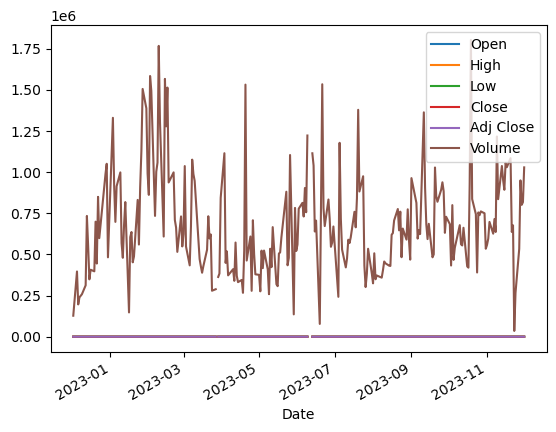

In [7]:
TSLA.plot()

## b.

This plot is easiler to see because I am only focuing on the "Close" column, so the issues mentioned on the previous point is not exist -- now I can clearly see the trend in "Close" column.

This plot describes the trend of closing price for TSLA.NE. The performance of close price is better in the second half of 2023. The lowest close price occured in January, while the highest close price occured near July.

<Axes: xlabel='Date'>

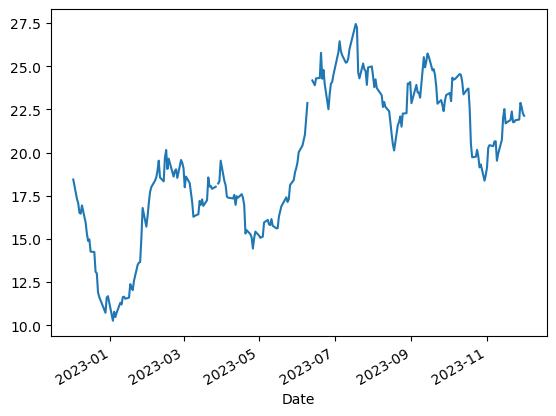

In [8]:
TSLA['Close'].plot()

## c.

I choose look for the close price of TSLA specifically in July, with line color changed to red and style changed to dashed.

<Axes: title={'center': 'Close price of TSLA in January 2022'}, xlabel='Date'>

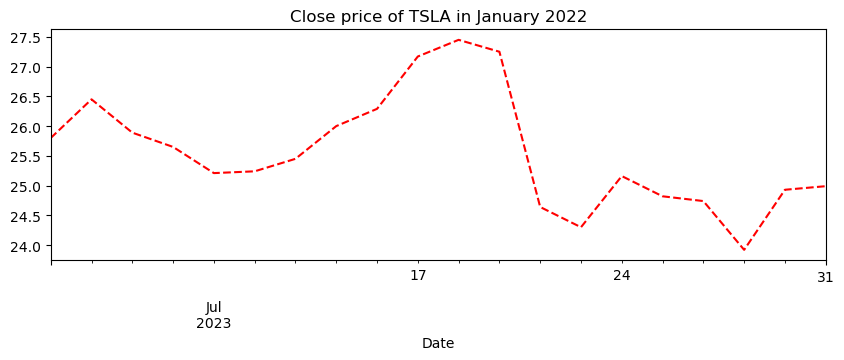

In [9]:
TSLA[TSLA.index.month == 7]['Close'].plot(figsize=(10,3),
                                          title = 'Close price of TSLA in January 2022',
                                         color = 'red',
                                         style = '--')

## G. Close price with 10-day moving average v.s 50-day moving average

The 10-day moving average represents a shorter-term trend, and it reacts more quickly to recent price changes. On the other hands, 50-day moving average represents a longer-term trend, with smoother and less responsive to short-term price fluctuations. Each of the indicators has its own pros and cons:

1. Shorter Moving Average (10-Day):

    Pros:
    - Provides early signals for potential trend changes.
    - Better suited for short-term traders and active investors.
    - Helps capture quick price movements.

    Cons:
    - More sensitive to market noise and can result in false signals.
    - May lead to more frequent trading and transaction costs.

2. Longer Moving Average (e.g., 50-Day):

    Pros:
    - Filters out short-term noise and offers a more stable trend view.
    - Generates fewer, but more reliable, signals for longer-term investors.
    - Reduces the likelihood of whipsaws (false signals).

    Cons:
    - Responds more slowly to changes in price trends, potentially missing early entry or exit points.
    - May not be suitable for traders who want to capitalize on short-term price movements.

<Axes: title={'center': 'Close price with 10-day moving average v.s 50-day moving average'}, xlabel='Date'>

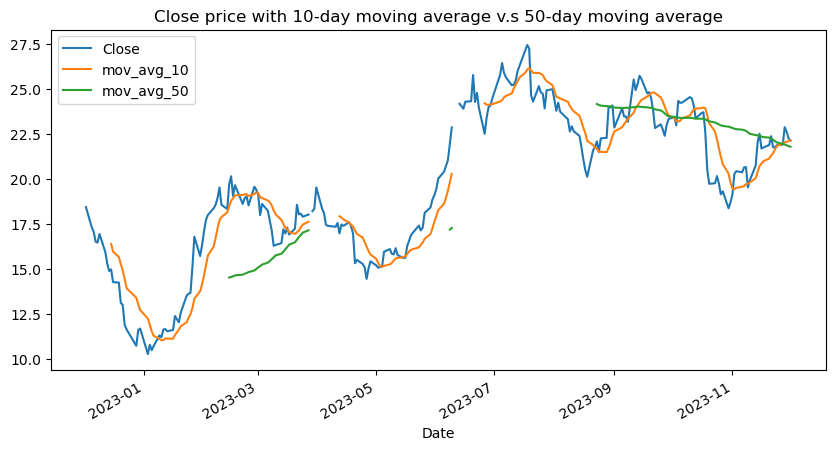

In [10]:
moving_avg_10 = TSLA['Close'].rolling(window=10).mean()
moving_avg_50 = TSLA['Close'].rolling(window=50).mean()

TSLA['mov_avg_10'] = moving_avg_10
TSLA['mov_avg_50'] = moving_avg_50

plot_variable = ['Close','mov_avg_10','mov_avg_50']
TSLA[plot_variable].plot(title = 'Close price with 10-day moving average v.s 50-day moving average',
                        figsize = (10,5))

## H.

Resampling a time series is a powerful method to change the frequency of time series data. This is crucial for a variety of reasons such as standardizing data with different time intervals to a common frequency, reducing noise and smoothing out the data for better trend analysis, and aggregating data to a higher level to simplify analysis and visualization. 

For example, high-frequency stock market data can be resampled to daily or monthly frequencies to focus on longer-term trends rather than short-term fluctuations. Resampling also helps to fill in missing time periods with interpolated data, ensuring a continuous time series which is essential for many time series forecasting models.

<Axes: xlabel='Date'>

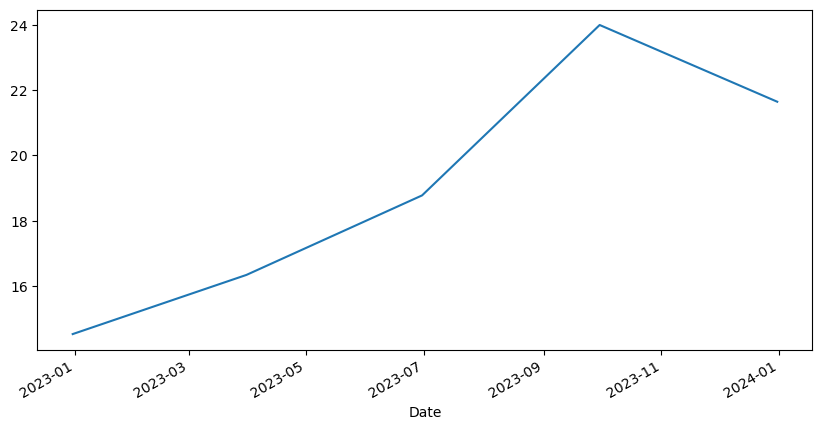

In [11]:
TSLA_quarterly_mean = TSLA['Close'].resample('Q').mean()
TSLA_quarterly_mean.plot(x_compat=True,
                        figsize = (10,5))

In [12]:
print(TSLA_quarterly_mean)

Date
2022-12-31    14.522105
2023-03-31    16.335161
2023-06-30    18.772258
2023-09-30    23.994839
2023-12-31    21.642954
Freq: Q-DEC, Name: Close, dtype: float64


# Part II

In [13]:
ad = pd.read_csv('/Users/leon/My Drive/BU ABA/AD654/Assignment 5/ad_data.csv')
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   YouTube  200 non-null    float64
 1   Spotify  200 non-null    float64
 2   Banners  200 non-null    float64
 3   Sales    200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


## a.

In [14]:
ad2 = ad.loc[:]
ad2['Total_Spending'] = ad2['YouTube'] + ad2['Spotify'] + ad2['Banners']

## b.

The correlation between total spending and sales is 0.87. Although it means these two variables are highly related, we cannot conclude we could have more sales with more spending because the total sales consisted of three sources: Youtube, Spotify and Banners. Each three factors might have different correlation with the sales, so it's better to seperate to three parts to realize the correlation of sales with three different channels.

The correlation between total spending and sales is: 0.87


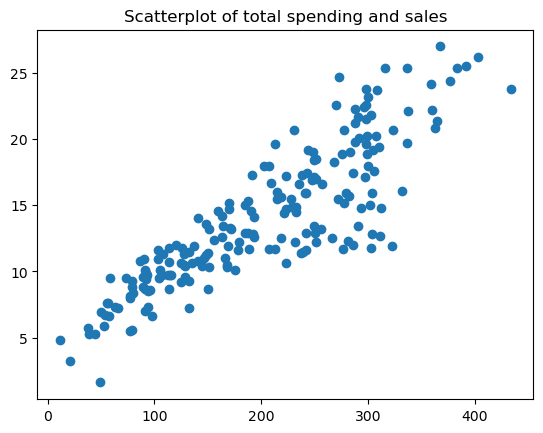

In [15]:
correlation = ad2['Total_Spending'].corr(ad2['Sales'])
plt.scatter(ad2['Total_Spending'],ad2['Sales'])
plt.title('Scatterplot of total spending and sales')
print('The correlation between total spending and sales is:', round(correlation,2))

## c.

Before using the spending in three channels to predict sales, firstly I check if three are strong correlation among three channels -- the result shows three channels are not strongly affecting each other.

In [16]:
ad2[['YouTube','Spotify','Banners']].corr()

,YouTube,Spotify,Banners
YouTube,1.000000,0.054809,0.056648
Spotify,0.054809,1.000000,0.354104
Banners,0.056648,0.354104,1.000000


## d.

The p-value of the F-statistic is 1.58e-96, which is really low, indicating that there is strong evidence that at least one of the independent variables (YouTube ad spending, Spotify ad spending, or banner ad spending) has a statistically significant impact on the dependent variable (Sales). Besides, the overall regression model is likely a good fit for the data because it explains a significant amount of the variation in the dependent variable.

After looking deeper in this model, the p-value of YouTube and Spotify is 0 -- meaning they have significant impact on Sales. However, Banners get a p-value of 0.86 -- meaning Banners does not have strong impact toward Sales.




In [17]:
X = ad2[['YouTube','Spotify','Banners']]
y = ad2['Sales']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 03 Dec 2023   Prob (F-statistic):           1.58e-96
Time:                        23:09:32   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

## e.
### i.

The p-value of all variables are 0, meaning YouTube ad spending and Spotify ad spending both have significant and independent effects on Sales. Also, the interaction between YouTube and Spotify ad spending is also highly significant and represents a combined effect beyond their individual contributions.



In [18]:
ad2['Interaction'] = ad2['YouTube'] * ad2['Spotify']
X = ad2[['YouTube','Spotify','Interaction']]
y = ad2['Sales']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Sun, 03 Dec 2023   Prob (F-statistic):          6.68e-146
Time:                        23:09:32   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           6.7502      0.248     27.233      

### ii. 
The r-square with interaction is 0.968 -- higher than that without interaction (0.897). Since r-square indicates how well the model fits the data, it is clear to see the model performs better when considering the interaction between YouTube and Spotify ad spending.

In [19]:
X = ad2[['YouTube','Spotify']]
y = ad2['Sales']
X = sm.add_constant(X)
model_nointeraction = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Sun, 03 Dec 2023   Prob (F-statistic):          6.68e-146
Time:                        23:09:32   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           6.7502      0.248     27.233      

### iii.

With spending 150 on YouTube and 30 on Spotify, the Sales prediction (by using the model with interaction) is: 1,142.98

In [20]:
YouTube = 150
Spotify = 30

input_data = pd.DataFrame({'YouTube': [YouTube],
                           'Spotify': [Spotify],
                           'Interaction': [YouTube * Spotify],
                           'const': [1]})

# Use the model to make predictions
predicted_sales = model.predict(input_data)

# Print the predicted sales outcome
print("Predicted Sales:", round(predicted_sales.iloc[0],2))


Predicted Sales: 1142.98


### iiii.

In marketing terms, the interaction between YouTube and Spotify ad spending suggests that when you invest in both YouTube and Spotify ads simultaneously, their effectiveness in driving sales is not just additive but can create a synergy that leads to a greater boost in sales than using either platform alone. It highlights the importance of considering the joint influence of these advertising channels for optimizing marketing strategies and maximizing sales outcomes.

## f.

I create an example involving an interaction term in a model. Imagine a marketing campaign where the two main variables are "Advertisement Type" (online ads vs. traditional media ads) and "Discount Offered" (low vs. high). The outcome variable I am interested in is "Sales Increase.

In this scenario, the interaction term is the combination of "Advertisement Type" and "Discount Offered." It might turn out that online ads combined with a high discount lead to a significantly larger increase in sales than any other combination. This interaction effect is positive, as it enhances sales more than the sum of its parts.

My reaction to this interaction is not surprise. It makes intuitive sense: online ads, which often have a more targeted reach, combined with attractive discounts, can be a powerful driver for consumer purchases. This synergy illustrates the importance of considering how different marketing strategies can complement each other, rather than just assessing them in isolation.

# Part III Google Trend comparision between Celtics and Warriors

In region comparision, the map shows that Celtics is trending mainly in east coast, while Warriors is trending in middle and west coast more. This might because Celtics is from Boston -- the east coast, while Warriors is from San Franscisco -- the west coast.

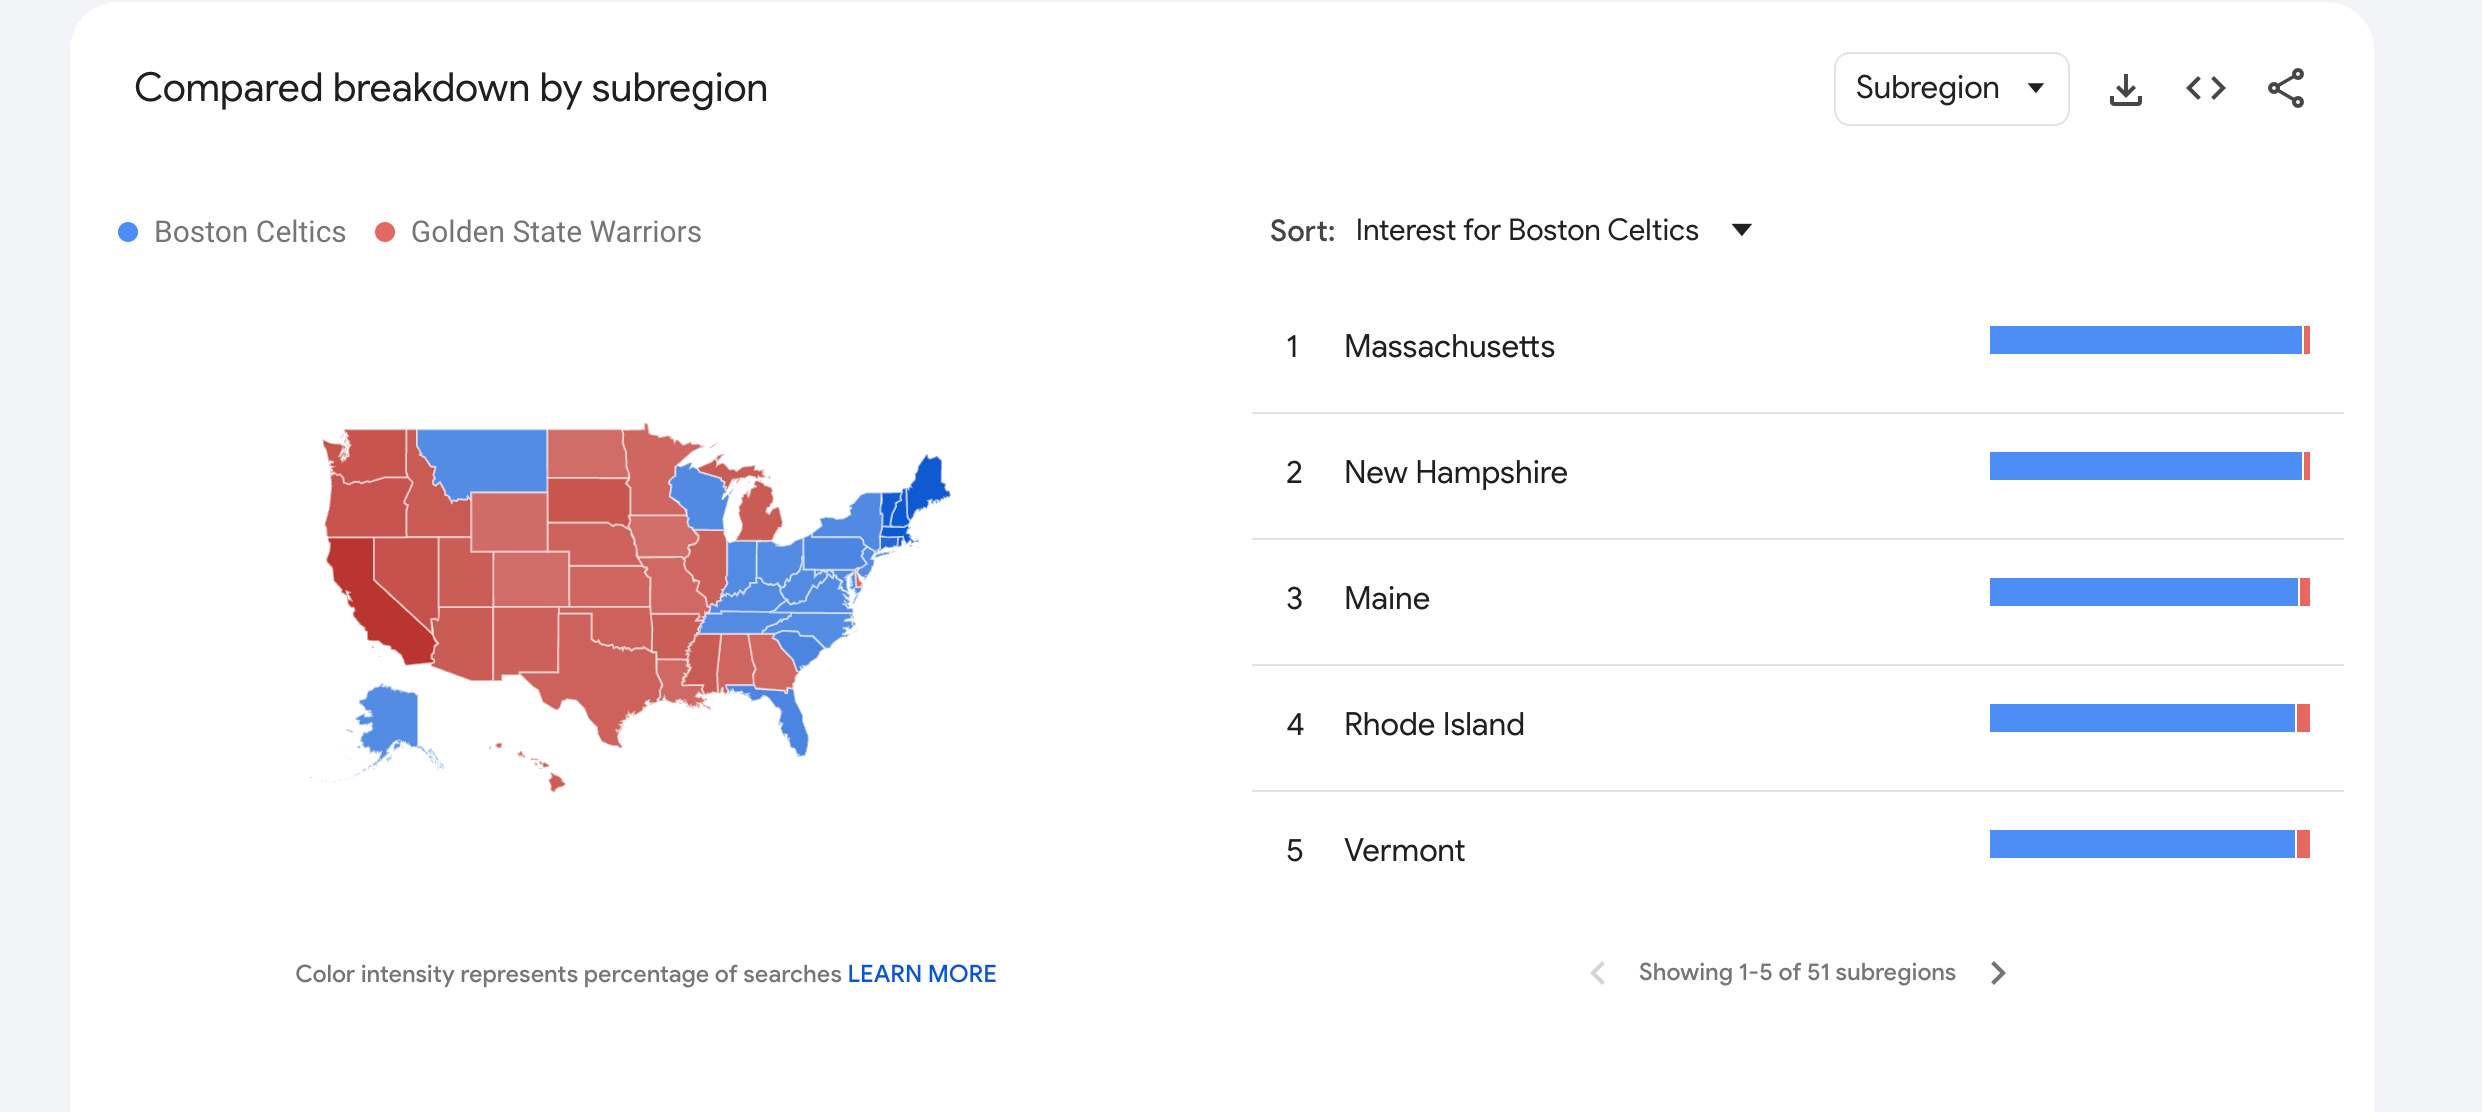

## Rising query for each team

- Celtics: jayson tatum vs indiana pacers
This query is rising might because jayson tatum is a famous player in Celtics, and Celtics just finished a game with indiana pacers, so people are finding game result and deeper game insight from the internet.

- Warriors: la clippers vs golden state warriors
This query is the most rising one for Warriors, and the reason might also because Warriors just finished the game with Clippers.

## How Google Trend can help marketers?

In my opinion, Google Trend can help markers to find what's the rising / trending in a specific area. For example, if I were working as a marketing specialist for Celtics and realizing everyone is caring about jayson tatum, I could let jayson tatum promote company event or products more in the public, further boosting revenues.